# Beginner

## Task 03: Explore the evolution of topics in Old English over time.

This code explores the evolution of topics in Old English literature over time. It identifies latent topics in texts from different periods and visualizes how the prominence of these topics shifts across those periods.

Description:
- Divide your corpus into time periods (e.g., early, middle, late Old English) and analyze how topics change or use similar dataset

Hints:
- You may need to collect metadata about the dates of texts
- Consider using dynamic topic modeling if you have enough data.

**Libraries:**

* **nltk:**
    * `stopwords`: Filters out common words.
    * `tokenize`: Splits text into words (tokens).
    * `stem`: Reduces words to their root form.
* **gensim:**
    * `corpora`: Tools for creating a dictionary and text corpus.
    * `models.LdaMulticore`: Implementation of Latent Dirichlet Allocation (LDA), our topic model.
* **string:**  Handles string manipulations (like removing punctuation).
* **numpy:** Performs numerical calculations.
* **matplotlib.pyplot:**  Visualizes results with a stacked bar chart.
* **collections.defaultdict:** Provides convenient dictionary-like storage.

**Code Workflow:**

1. **Data Preparation:**
   * Load Old English texts with their approximate dates.
   * Define time periods (e.g., "Early," "Middle," "Late").
   * `preprocess` function:
      * Tokenizes text.
      * Converts to lowercase.
      * Removes punctuation and numbers.
      * Removes English stop words (consider Old English stop words instead).
      * Lemmatizes words.
   * Group preprocessed texts by time period.

2. **Topic Modeling with LDA:**
   * Combine all preprocessed texts.
   * Create a dictionary mapping words to IDs.
   * Build a corpus representing each text as word frequencies.
   * Train the LDA model to find `num_topics` (set to 5) within the corpus.
   * Calculate the average topic distribution for each time period.

3. **Visualization and Results:**
   * Generate a stacked bar chart showing the proportion of each topic across time periods.
   * Print the top words associated with each topic to reveal their themes.

**Enhancements for Old English:**

* **Stop Words:** Incorporate a list of Old English stop words.
* **Lemmatization:** Utilize a lemmatizer specifically designed for Old English.
* **Data:** Ensure the sample texts and their dates are representative of the Old English literary landscape.

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


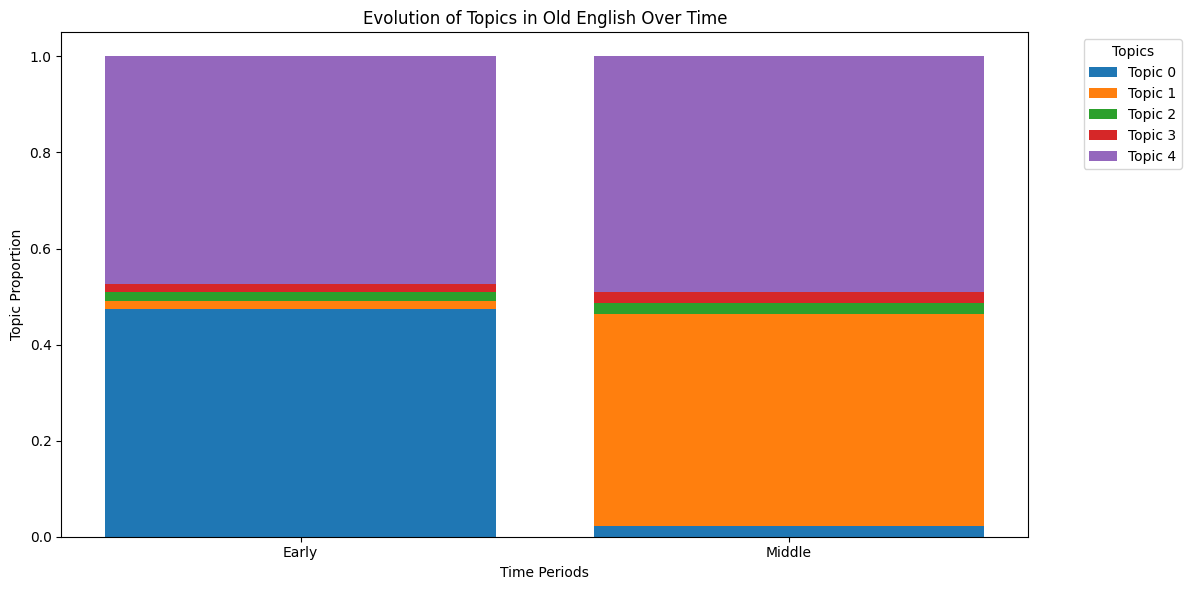

Top words for each topic:
Topic: 0 
Words: 0.062*"æþelingas" + 0.061*"þeodcyninga" + 0.060*"gefrunon" + 0.059*"gardena" + 0.058*"fremedon" + 0.058*"ellen" + 0.057*"ða" + 0.057*"hu" + 0.056*"geardagum" + 0.053*"þrym"

Topic: 1 
Words: 0.077*"god" + 0.077*"gesceop" + 0.077*"anginne" + 0.077*"eorðan" + 0.077*"heofonan" + 0.034*"monegum" + 0.032*"scyld" + 0.032*"þreatum" + 0.031*"mægþum" + 0.031*"ofteah"

Topic: 2 
Words: 0.059*"hwæt" + 0.054*"þrym" + 0.050*"geardagum" + 0.049*"hu" + 0.049*"ða" + 0.048*"ellen" + 0.047*"fremedon" + 0.046*"gardena" + 0.045*"gefrunon" + 0.044*"þeodcyninga"

Topic: 3 
Words: 0.026*"god" + 0.026*"heofonan" + 0.026*"anginne" + 0.026*"eorðan" + 0.026*"gesceop" + 0.026*"wæs" + 0.026*"æþelingas" + 0.026*"hu" + 0.026*"egsode" + 0.026*"geardagum"

Topic: 4 
Words: 0.074*"god" + 0.074*"wæs" + 0.040*"hit" + 0.040*"ealles" + 0.040*"þam" + 0.040*"æfre" + 0.040*"ær" + 0.040*"se" + 0.040*"þa" + 0.040*"þe"



In [1]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import gensim
from gensim import corpora
import string
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Sample Old English texts with approximate dates
# Format: (text, year)
# Note: These are placeholder texts and dates. Replace with actual data.
texts_with_dates = [
    ("Hwæt! We Gardena in geardagum, þeodcyninga, þrym gefrunon, hu ða æþelingas ellen fremedon.", 700),
    ("Oft Scyld Scefing sceaþena þreatum, monegum mægþum, meodosetla ofteah, egsode eorlas.", 750),
    ("Ær þam þe hit ealles ware, þa wæs se Ælmihtiga God, and he wæs æfre God.", 900),
    ("On anginne gesceop God heofonan and eorðan.", 1000),
    # Add more texts with their approximate dates
]

# Define time periods
periods = {
    "Early": (0, 800),
    "Middle": (801, 1000),
    "Late": (1001, 1200)
}

# Preprocessing function
def preprocess(text):
    tokens = word_tokenize(text.lower())
    tokens = [token for token in tokens if token not in string.punctuation and not token.isdigit()]
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return tokens

# Preprocess all texts and group by period
texts_by_period = defaultdict(list)
for text, year in texts_with_dates:
    processed_text = preprocess(text)
    for period, (start, end) in periods.items():
        if start <= year <= end:
            texts_by_period[period].append(processed_text)
            break

# Create dictionary and corpus
all_texts = [text for period_texts in texts_by_period.values() for text in period_texts]
dictionary = corpora.Dictionary(all_texts)
corpus = [dictionary.doc2bow(text) for text in all_texts]

# Train LDA model
num_topics = 5  # You can adjust this
lda_model = "HOW DO WE TRAIN AN LDA MODEL"

# Function to get average topic distribution for a period
def get_avg_topic_dist(texts):
    period_corpus = [dictionary.doc2bow(text) for text in texts]
    topic_dists = [dict(lda_model.get_document_topics(doc)) for doc in period_corpus]
    avg_dist = {i: np.mean([dist.get(i, 0) for dist in topic_dists]) for i in range(num_topics)}
    return avg_dist

# Get average topic distributions for each period
period_distributions = {period: get_avg_topic_dist(texts) for period, texts in texts_by_period.items()}

# Prepare data for visualization
topics = range(num_topics)
periods = list(period_distributions.keys())
topic_scores = [[period_distributions[period][topic] for period in periods] for topic in topics]

# Create stacked bar chart
fig, ax = plt.subplots(figsize=(12, 6))
bottom = np.zeros(len(periods))

for topic, scores in enumerate(topic_scores):
    ax.bar(periods, scores, bottom=bottom, label=f'Topic {topic}')
    bottom += scores

ax.set_xlabel('Time Periods')
ax.set_ylabel('Topic Proportion')
ax.set_title('Evolution of Topics in Old English Over Time')
ax.legend(title='Topics', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

# Print top words for each topic
print("Top words for each topic:")
for idx, topic in lda_model.print_topics(-1):
    print(f"Topic: {idx} \nWords: {topic}\n")

## Solution

1: lda_model = gensim.models.LdaMulticore(corpus=corpus, id2word=dictionary, num_topics=num_topics)
